크로바 카드를 하트 카드로 바꾸는 마술을 하고자 합니다. 카드 형태를 유지한 상태에서 문양의 색상 및 모양만을 바꿀 수 있는 지에 대한 테스트인데요, 여러가지로 활용도가 높은 것 같습니다. 이 문제를 "Image-to-Image Translation"이라고 부르며, pix2pix 모델이 유명합니다. 테스트 결과 pix2pix 모델은 기대한 만큼 성능을 보여주었습니다. 학습시키지 않은 카드를 이용하여 여러가지 실험도 해보왔는데요, 이 실험을 통해 학습한 모델을 이해하는 데 도움이 되었습니다.

---
### 문제 정의

크로바 카드와 하트 카드를 쌍으로 모델을 학습시킨 후, 크로바 카드를 입력하면 하트 카드 이미지를 만들어주는 것이 목표입니다.

![img](https://tykimos.github.io/warehouse/2017-11-5-Card_Symbol_Magic_01.png)

---
### 데이터셋 생성

먼저 크로바와 하트 한 쌍의 카드 이미지가 필요합니다. 크로바 13장과 하트 13장을 찍었습니다.

![img](https://tykimos.github.io/warehouse/2017-11-5-Card_Symbol_Magic_04.png)

아래는 카드를 찍는 모습니다. 한 쌍의 이미지를 찍을 때 유의할 점은 크로바, 하트 카드 한 쌍을 찍을 때, 위치가 정확하게 동일해야 되는다는 점입니다. 그래서 크로바 카드를 찍은 다음, 동일 위치에 하트 카드를 포개서 다시 찍었습니다.

![img](https://tykimos.github.io/warehouse/2017-11-5-Card_Symbol_Magic_02.png)

손으로 정확하게 맞춘다고 맞춰도 이미지 상에서 조금씩 차이가 있었습니다. 그래서 포토샵으로 정밀 위치 보정을 했습니다. 두 장의 카드를 켭쳐보니 알게된 사실이 몇가지가 있었습니다. 첫번째, JQK 인 경우 원래 차이가 난다는 정도는 알고 있었지만 얼굴 방향이라던지 팔의 위치라던지 생각보다 더 많이 차이가 났었습니다.

![img](https://tykimos.github.io/warehouse/2017-11-5-Card_Symbol_Magic_03.png)

두번째,카드는 상하가 동일할 것이라고 생각했었는데, 홀수 카드인 경우 상하 방향이 다르다는 점. 예를 들어 3인 경우 정방향 모양이 2개, 역방향 모양이 1개입니다. 이 모양을 잘 보고 쌍을 맞추어 촬영해야 합니다.

![img](https://tykimos.github.io/warehouse/2017-11-5-Card_Symbol_Magic_05.png)

세번째, 문양 매칭 위치가 조끔씩 차이가 나는 점입니다. 모든 크로바 위치에 정확하게 하트 문양이 놓여 있는 것이 아니었습니다. 정위치에 있는 것도 있지만, 약간 왼쪽 또는 약간 오른쪽에 위치되어 있기도 합니다.

![img](https://tykimos.github.io/warehouse/2017-11-5-Card_Symbol_Magic_06.png)

마지막으로 데이터 부풀리기를 했습니다. 회전, 확대/축소, 틀어짐, 상하좌우 위치 이동 처리를 하였는데요, 크로바 카드와 하트 카드 한 쌍을 같은 처리를 해야됩니다.

![img](https://tykimos.github.io/warehouse/2017-11-5-Card_Symbol_Magic_07.png)

---
### 데이터셋 구성

학습 데이터셋 정보는 다음과 같습니다.
- 폴더 : warehouse/cards_ab/train
- 샘플 수 : 1000개
- 이미지 정보(너비 x 높이 x 채널) : 512 x 256 x 3
- 이미지 확장자 : jpg

검증 데이터셋 정보는 다음과 같습니다.
- 폴더 : warehouse/cards_ab/val
- 샘플 수 : 300개
- 이미지 정보(너비 x 높이 x 채널) : 512 x 256 x 3
- 이미지 확장자 : jpg

테스트 데이터 정보는 다음과 같습니다. 이 테스트 이미지는 크로바 카드을 움직이면서 촬영한 동영상을 프레임별로 저장한 것 입니다.
- 폴더 : warehouse/cards_ab/test_in
- 샘플 수 : 636개
- 이미지 정보(너비 x 높이 x 채널) : 256 x 256 x 3
- 이미지 확장자 : jpg

위의 데이터셋은 아래 링크에서 다운로드 받을 수 있습니다. 

https://www.dropbox.com/s/3vsa5r78ofsznpi/cards_ab.zip?dl=0

현재 소스 파일 위치에 warehouse 폴더를 생성한 다음, warehouse 폴더 안에 다운로드 받은 파일의 압축을 해제합니다.

---
### 테스트 결과

크로바 1 카드 동영상을 입력해서 하트 카드를 생성한 동영상입니다.

<iframe width="512" height="256" src="https://tykimos.github.io/warehouse/2017-11-5-Card_Symbol_Magic_c1.mp4" frameborder="0" allowfullscreen></iframe>

크로바 5 카드 동영상을 입력해서 하트 카드를 생성한 동영상입니다.

<iframe width="512" height="256" src="https://tykimos.github.io/warehouse/2017-11-5-Card_Symbol_Magic_c5.mp4" frameborder="0" allowfullscreen></iframe>

크로바 9 카드 동영상을 입력해서 하트 카드를 생성한 동영상입니다.

<iframe width="512" height="256" src="https://tykimos.github.io/warehouse/2017-11-5-Card_Symbol_Magic_c9.mp4" frameborder="0" allowfullscreen></iframe>

크로바 Q 카드 동영상을 입력해서 하트 카드를 생성한 동영상입니다.

<iframe width="512" height="256" src="https://tykimos.github.io/warehouse/2017-11-5-Card_Symbol_Magic_cq.mp4" frameborder="0" allowfullscreen></iframe>

크로바 카드를 순차적으로 바꾼 동영상을 입력해서 하트 카드를 생성한 동영상입니다.

<iframe width="512" height="256" src="https://tykimos.github.io/warehouse/2017-11-5-Card_Symbol_Magic_c_seq.mp4" frameborder="0" allowfullscreen></iframe>

크로바 카드 이미지를 입력해서 하트 카드 이미지를 만드는 것은 만족스로운 수준입니다. 만약 하트 카드를 입력하면 어떻게 될까요? 스페이드는? 여러 장의 카드를 입력하면 어떻게 될까요? 조커 카드는 어떻게 바꿀까요? 여러가지 질문이 떠오르실 수 있습니다. 비정상 입력 테스트 결과는 결론에서 설명하도록 하겠습니다.

---
### 전체 소스

https://github.com/tjwei/GANotebooks/blob/master/pix2pix-keras.ipynb 사이트에서 제공하는 소스를 기반으로 현재 예제에 맞게 조금 수정했습니다. 

In [1]:
import os
os.environ['KERAS_BACKEND']='tensorflow' # can choose theano, tensorflow, cntk
os.environ['THEANO_FLAGS']='floatX=float32,device=cuda,optimizer=fast_run,dnn.library_path=/usr/lib'

import keras.backend as K
K.set_image_data_format('channels_last')
channel_axis = -1

Using TensorFlow backend.


In [2]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, ZeroPadding2D, BatchNormalization, Input, Dropout
from keras.layers import Conv2DTranspose, Reshape, Activation, Cropping2D, Flatten
from keras.layers import Concatenate
from keras.layers.advanced_activations import LeakyReLU
from keras.activations import relu
from keras.initializers import RandomNormal

In [3]:
# Weights initializations
# bias are initailized as 0
def __conv_init(a):
    print("conv_init", a)
    k = RandomNormal(0, 0.02)(a) # for convolution kernel
    k.conv_weight = True    
    return k
conv_init = RandomNormal(0, 0.02)
gamma_init = RandomNormal(1., 0.02) # for batch normalization

In [4]:
# Basic discriminator
def conv2d(f, *a, **k):
    return Conv2D(f, kernel_initializer = conv_init, *a, **k)

def batchnorm():
    return BatchNormalization(momentum=0.9, axis=channel_axis, epsilon=1.01e-5,
                                   gamma_initializer = gamma_init)
def BASIC_D(nc_in, nc_out, ndf, max_layers=3):
    """DCGAN_D(nc, ndf, max_layers=3)
       nc: channels
       ndf: filters of the first layer
       max_layers: max hidden layers
    """    
    input_a, input_b = Input(shape=(None, None, nc_in)), Input(shape=(None, None, nc_out))
    
    _ = Concatenate(axis=channel_axis)([input_a, input_b])
    _ = conv2d(ndf, kernel_size=4, strides=2, padding="same", name = 'First') (_)
    _ = LeakyReLU(alpha=0.2)(_)
    
    for layer in range(1, max_layers):        
        out_feat = ndf * min(2**layer, 8)
        _ = conv2d(out_feat, kernel_size=4, strides=2, padding="same", 
                   use_bias=False, name = 'pyramid.{0}'.format(layer)             
                        ) (_)
        _ = batchnorm()(_, training=1)        
        _ = LeakyReLU(alpha=0.2)(_)
    
    out_feat = ndf*min(2**max_layers, 8)
    _ = ZeroPadding2D(1)(_)
    _ = conv2d(out_feat, kernel_size=4,  use_bias=False, name = 'pyramid_last') (_)
    _ = batchnorm()(_, training=1)
    _ = LeakyReLU(alpha=0.2)(_)
    
    # final layer
    _ = ZeroPadding2D(1)(_)
    _ = conv2d(1, kernel_size=4, name = 'final'.format(out_feat, 1), 
               activation = "sigmoid") (_)    
    return Model(inputs=[input_a, input_b], outputs=_)

In [5]:
def UNET_G(isize, nc_in=3, nc_out=3, ngf=64, fixed_input_size=True):    
    max_nf = 8*ngf    
    def block(x, s, nf_in, use_batchnorm=True, nf_out=None, nf_next=None):
        # print("block",x,s,nf_in, use_batchnorm, nf_out, nf_next)
        assert s>=2 and s%2==0
        if nf_next is None:
            nf_next = min(nf_in*2, max_nf)
        if nf_out is None:
            nf_out = nf_in
        x = conv2d(nf_next, kernel_size=4, strides=2, use_bias=(not (use_batchnorm and s>2)),
                   padding="same", name = 'conv_{0}'.format(s)) (x)
        if s>2:
            if use_batchnorm:
                x = batchnorm()(x, training=1)
            x2 = LeakyReLU(alpha=0.2)(x)
            x2 = block(x2, s//2, nf_next)
            x = Concatenate(axis=channel_axis)([x, x2])            
        x = Activation("relu")(x)
        x = Conv2DTranspose(nf_out, kernel_size=4, strides=2, use_bias=not use_batchnorm,
                            kernel_initializer = conv_init,          
                            name = 'convt.{0}'.format(s))(x)        
        x = Cropping2D(1)(x)
        if use_batchnorm:
            x = batchnorm()(x, training=1)
        if s <=8:
            x = Dropout(0.5)(x, training=1)
        return x
    
    s = isize if fixed_input_size else None
    
    _ = inputs = Input(shape=(s, s, nc_in))        
    _ = block(_, isize, nc_in, False, nf_out=nc_out, nf_next=ngf)
    _ = Activation('tanh')(_)
    return Model(inputs=inputs, outputs=[_])

In [6]:
nc_in = 3
nc_out = 3
ngf = 64
ndf = 64
lamda = 10

loadSize = 286
imageSize = 256
batchSize = 1
lrD = 2e-4
lrG = 2e-4

In [7]:
netD = BASIC_D(nc_in, nc_out, ndf)
netD.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, None, None, 3) 0                                            
____________________________________________________________________________________________________
input_2 (InputLayer)             (None, None, None, 3) 0                                            
____________________________________________________________________________________________________
concatenate_1 (Concatenate)      (None, None, None, 6) 0           input_1[0][0]                    
                                                                   input_2[0][0]                    
____________________________________________________________________________________________________
First (Conv2D)                   (None, None, None, 64 6208        concatenate_1[0][0]     

In [8]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

netG = UNET_G(imageSize, nc_in, nc_out, ngf)
SVG(model_to_dot(netG, show_shapes=True).create(prog='dot', format='svg'))
netG.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_3 (InputLayer)             (None, 256, 256, 3)   0                                            
____________________________________________________________________________________________________
conv_256 (Conv2D)                (None, 128, 128, 64)  3136        input_3[0][0]                    
____________________________________________________________________________________________________
leaky_re_lu_5 (LeakyReLU)        (None, 128, 128, 64)  0           conv_256[0][0]                   
____________________________________________________________________________________________________
conv_128 (Conv2D)                (None, 64, 64, 128)   131072      leaky_re_lu_5[0][0]              
___________________________________________________________________________________________

In [9]:
from keras.optimizers import RMSprop, SGD, Adam

In [10]:
real_A = netG.input
fake_B = netG.output
netG_generate = K.function([real_A], [fake_B])
real_B = netD.inputs[1]
output_D_real = netD([real_A, real_B])
output_D_fake = netD([real_A, fake_B])

In [11]:
loss_fn = lambda output, target : -K.mean(K.log(output+1e-12)*target+K.log(1-output+1e-12)*(1-target))

loss_D_real = loss_fn(output_D_real, K.ones_like(output_D_real))
loss_D_fake = loss_fn(output_D_fake, K.zeros_like(output_D_fake))
loss_G_fake = loss_fn(output_D_fake, K.ones_like(output_D_fake))

loss_L1 = K.mean(K.abs(fake_B-real_B))

In [12]:
loss_D = loss_D_real +loss_D_fake
training_updates = Adam(lr=lrD, beta_1=0.5).get_updates(netD.trainable_weights,[],loss_D)
netD_train = K.function([real_A, real_B],[loss_D/2.0], training_updates)

In [13]:
loss_G = loss_G_fake   + 100 * loss_L1
training_updates = Adam(lr=lrG, beta_1=0.5).get_updates(netG.trainable_weights,[], loss_G)
netG_train = K.function([real_A, real_B], [loss_G_fake, loss_L1], training_updates)

In [14]:
from PIL import Image
import numpy as np
import glob
from random import randint, shuffle

def load_data(file_pattern):
    return glob.glob(file_pattern)

def read_image(fn, direction=0):
    im = Image.open(fn)
    im = im.resize( (loadSize*2, loadSize), Image.BILINEAR )
    arr = np.array(im)/255.0*2-1
    w1,w2 = (loadSize-imageSize)//2,(loadSize+imageSize)//2
    h1,h2 = w1,w2
    
    imgA = arr[h1:h2, loadSize+w1:loadSize+w2, :]
    imgB = arr[h1:h2, w1:w2, :]

    if direction==0:
        return imgA, imgB
    else:
        return imgB,imgA

direction = 1

trainAB = load_data('./warehouse/cards_ab/train/*.jpg')
valAB = load_data('./warehouse/cards_ab/val/*.jpg')

assert len(trainAB) and len(valAB)

In [15]:
def minibatch(dataAB, batchsize, direction=0):
    length = len(dataAB)
    epoch = i = 0
    tmpsize = None    
    while True:
        size = tmpsize if tmpsize else batchsize
        if i+size > length:
            shuffle(dataAB)
            i = 0
            epoch+=1        
        dataA = []
        dataB = []
        for j in range(i,i+size):
            imgA,imgB = read_image(dataAB[j], direction)
            dataA.append(imgA)
            dataB.append(imgB)
        dataA = np.float32(dataA)
        dataB = np.float32(dataB)
        i+=size
        tmpsize = yield epoch, dataA, dataB        

In [18]:
from IPython.display import display
def showX(X, rows=1):
    assert X.shape[0]%rows == 0
    
    int_X = ( (X+1)/2.0*255).clip(0,255).astype('uint8')
    int_X = int_X.reshape(-1,imageSize,imageSize, 3)
    int_X = int_X.reshape(rows, -1, imageSize, imageSize,3).swapaxes(1,2).reshape(rows*imageSize,-1, 3)

    display(Image.fromarray(int_X))

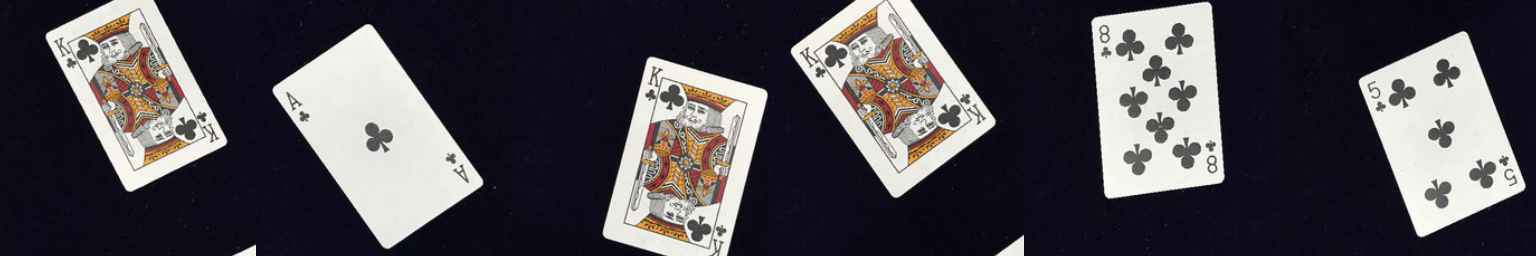

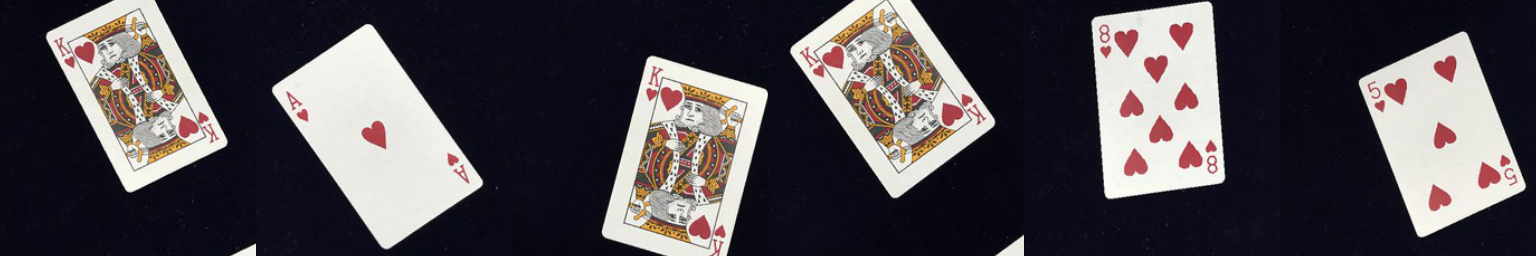

In [19]:
train_batch = minibatch(trainAB, 6, direction=direction)
_, trainA, trainB = next(train_batch)
showX(trainA)
showX(trainB)
del train_batch, trainA, trainB

![png](https://tykimos.github.io/warehouse/2017-11-5-Card_Symbol_Magic_output_23_0.png)

![png](https://tykimos.github.io/warehouse/2017-11-5-Card_Symbol_Magic_output_23_1.png)

In [20]:
def netG_gen(A):
    return np.concatenate([netG_generate([A[i:i+1]])[0] for i in range(A.shape[0])], axis=0)

In [ ]:
import time
from IPython.display import clear_output
t0 = time.time()
niter = 50
gen_iterations = 0
errL1 = epoch = errG = 0
errL1_sum = errG_sum = errD_sum = 0

display_iters = 500
val_batch = minibatch(valAB, 6, direction)
train_batch = minibatch(trainAB, batchSize, direction)

while epoch < niter: 
    epoch, trainA, trainB = next(train_batch)        
    errD,  = netD_train([trainA, trainB])
    errD_sum +=errD

    errG, errL1 = netG_train([trainA, trainB])
    errG_sum += errG
    errL1_sum += errL1
    gen_iterations+=1
    if gen_iterations%display_iters==0:
        if gen_iterations%(5*display_iters)==0:
            clear_output()
        print('[%d/%d][%d] Loss_D: %f Loss_G: %f loss_L1: %f'
        % (epoch, niter, gen_iterations, errD_sum/display_iters, errG_sum/display_iters, errL1_sum/display_iters), time.time()-t0)
        _, valA, valB = train_batch.send(6) 
        fakeB = netG_gen(valA)
        showX(np.concatenate([valA, valB, fakeB], axis=0), 3)
        errL1_sum = errG_sum = errD_sum = 0
        _, valA, valB = next(val_batch)
        fakeB = netG_gen(valA)
        showX(np.concatenate([valA, valB, fakeB], axis=0), 3)

In [ ]:
_, valA, valB = val_batch.send(6) 
fakeB = netG_gen(valA)
showX(np.concatenate([valA, valB, fakeB], axis=0), 3)
errL1_sum = errG_sum = errD_sum = 0
_, valA, valB = next(val_batch)
fakeB = netG_gen(valA)
showX(np.concatenate([valA, valB, fakeB], axis=0), 3)

In [ ]:
def read_single_image(fn):
    
    im = Image.open(fn)
    im = im.resize( (loadSize, loadSize), Image.BILINEAR )
    arr = np.array(im)/255.0*2-1
    w1,w2 = (loadSize-imageSize)//2,(loadSize+imageSize)//2
    h1,h2 = w1,w2
    img = arr[h1:h2, w1:w2, :]
    
    return img

In [ ]:
# 0~636

max_idx = 636
src_dir = './warehouse/cards_ab/test_in/'
dst_dir = './warehouse/cards_ab/test_out/'

for idx in range(max_idx+1):
    
    data = []
    
    src_path = src_dir + str(idx) + '.jpg'
    dst_path = dst_dir + str(idx) + '.jpg'
    
    src_img = read_single_image(src_path)
    data.append(src_img)
    data = np.float32(data)
        
    fake = netG_gen(data)

    int_X = ( (fake[0]+1)/2.0*255).clip(0,255).astype('uint8')
    int_X = int_X.reshape(-1,imageSize,imageSize, 3)
    int_X = int_X.reshape(1, -1, imageSize, imageSize,3).swapaxes(1,2).reshape(1*imageSize,-1, 3)

    dst_img = Image.fromarray(int_X)
    dst_img.save(dst_path, quality=90)

코드가 정상적으로 동작하면 './warehouse/cards_ab/test_out/' 폴더에 하트로 변환된 카드 이미지가 저장됩니다. 아래 동영상은 테스트에 사용된 입력 크로바 카드와 딥러닝 모델이 만든 하트 카드 이미지를 붙혀서 만든 것입니다.

<iframe width="512" height="256" src="https://tykimos.github.io/warehouse/2017-11-5-Card_Symbol_Magic_c3.mp4" frameborder="0" allowfullscreen></iframe>

---

### 결론

크로바 문양과 하트 문양 카드를 한 쌍으로 학습한 모델을 이용하여, 크로바 문양을 하트 문양으로 바꿔주는 실험을 해봤습니다. 현재 모델은 크로바 문양만 봐왔고, 하트 문양만 그려본 모델입니다. 이 모델에 다양한 입력에서 어떤 반응을 할 지 한 번 살펴보겠습니다.

크로바 카드 여러 장이 겹치게 찍은 동영상을 입력해서 하트 카드를 생성한 동영상입니다.

<iframe width="512" height="256" src="https://tykimos.github.io/warehouse/2017-11-5-Card_Symbol_Magic_c_mul.mp4" frameborder="0" allowfullscreen></iframe>

하트 카드 동영상을 입력해서 하트 카드를 생성한 동영상입니다.

<iframe width="512" height="256" src="https://tykimos.github.io/warehouse/2017-11-5-Card_Symbol_Magic_heart.mp4" frameborder="0" allowfullscreen></iframe>

여러 문양의 카드를 순차적으로 찍은 동영상을 입력해서 하트 카드를 생성한 동영상입니다.

<iframe width="512" height="256" src="https://tykimos.github.io/warehouse/2017-11-5-Card_Symbol_Magic_ab_seq.mp4" frameborder="0" allowfullscreen></iframe>

여러 문양의 카드 여러 장이 겹치게 찍은 동영상을 입력해서 하트 카드를 생성한 동영상입니다.

<iframe width="512" height="256" src="https://tykimos.github.io/warehouse/2017-11-5-Card_Symbol_Magic_ab_mul.mp4" frameborder="0" allowfullscreen></iframe>

---

### 같이 보기

* [강좌 목차](https://tykimos.github.io/lecture/)